<a href="https://colab.research.google.com/github/rnlchr/CPE019/blob/main/Emtech%202%20Project/Final_Project_Castillo%2C_Ronel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT IN EMPOWERING TECHNOLOGIES: MODEL DEPLYOMENT IN THE CLOUD** <BR>

Submitted by: Castillo, Ronel Christian V.

Submitted to: Engr. Robin Valenzuela

Section: CPE32S1

Date Submitted: 07/11/2025

The dataset we will be using will be from the public website for datasets Kaggle which is about **COVID-19 Xray Dataset (Train & Test Sets)**

Link: https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/code

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Importing Needed Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv
from PIL import Image
import warnings
import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Dense , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as dag
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [27]:
base_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/dataset/xray_dataset_covid19"
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')

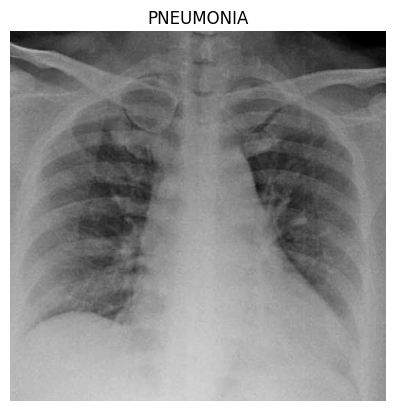

In [28]:
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
        plt.show()
        break
    break

In [29]:
h, w = 224, 224
b_size = 64

In [25]:
df_train =(os.path.join(df, "train"))
df_test =(os.path.join(df, "test"))

In [30]:
data_datagen = dag(rescale=1./255)

train_generator = data_datagen.flow_from_directory(
    train_dir,
    target_size=(h, w),
    batch_size=b_size,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = data_datagen.flow_from_directory(
    test_dir,
    target_size=(h, w),
    batch_size=b_size,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(h, w, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,106,689 (19.48 MB)

 Trainable params: 5,106,689 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train model
epochs = 15
earlystop = EarlyStopping(patience=5)

history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=b_size,
    validation_data=test_generator,
    callbacks=[earlystop]
)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 28s/step - accuracy: 0.4932 - loss: 0.7356 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5473 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4234 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5530 - loss: 0.6855 - val_accuracy: 0.5000 - val_loss: 0.6830
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5343 - loss: 0.6818 - val_accuracy: 0.9750 - val_loss: 0.6709
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8643 - loss: 0.6444 - val_accuracy: 1.0000 - val_loss: 0.5835
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8378 - loss: 0.5434 - val_accuracy: 1.0000 - val_loss: 0.4014
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8459 - loss: 0.3682 - val_accuracy: 1.0000 - val_loss: 0.2037
Epoch 9/15
3/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 1.0000 - loss: 0.0297
The Loss is: 0.0297
The Accuracy is: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


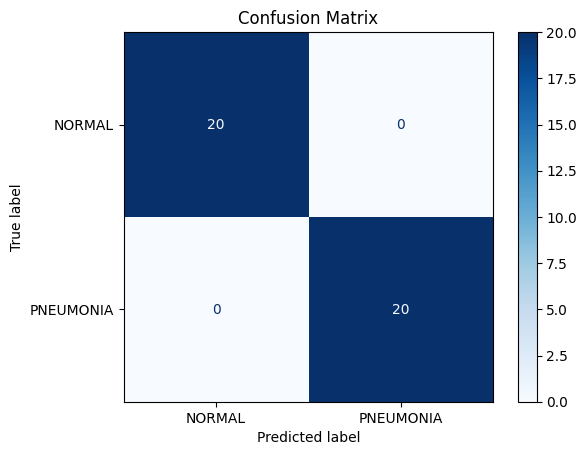

In [36]:
# Evaluate model
loss, accuracy = model.evaluate(test_generator)
print(f"The Loss is: {loss:.4f}")
print(f"The Accuracy is: {accuracy:.4f}")

# Confusion Matrix
pred_probs = model.predict(test_generator)
pred_classes = (pred_probs > 0.5).astype(int)
true_labels = test_generator.classes

cm = confusion_matrix(true_labels, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [39]:
# Test on a single image
image_path = os.path.join(test_dir, "PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg")
image_pil = Image.open(image_path).convert("RGB")
image_np = tf.keras.utils.img_to_array(image_pil)
img_gray = cv.cvtColor(image_np, cv.COLOR_RGB2GRAY)
img_resized = cv.resize(img_gray, (224, 224))
img_norm = img_resized / 255.0
img_input = img_norm.reshape(1, 224, 224, 1)

prediction = model.predict(img_input)[0][0]

if prediction >= 0.5:
    print(f"Case detected is **PNEUMONIA** with confidence {prediction * 100:.2f}%")
else:
    print(f"Case detected is **NORMAL** with confidence {(1 - prediction) * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Case detected is **PNEUMONIA** with confidence 99.91%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


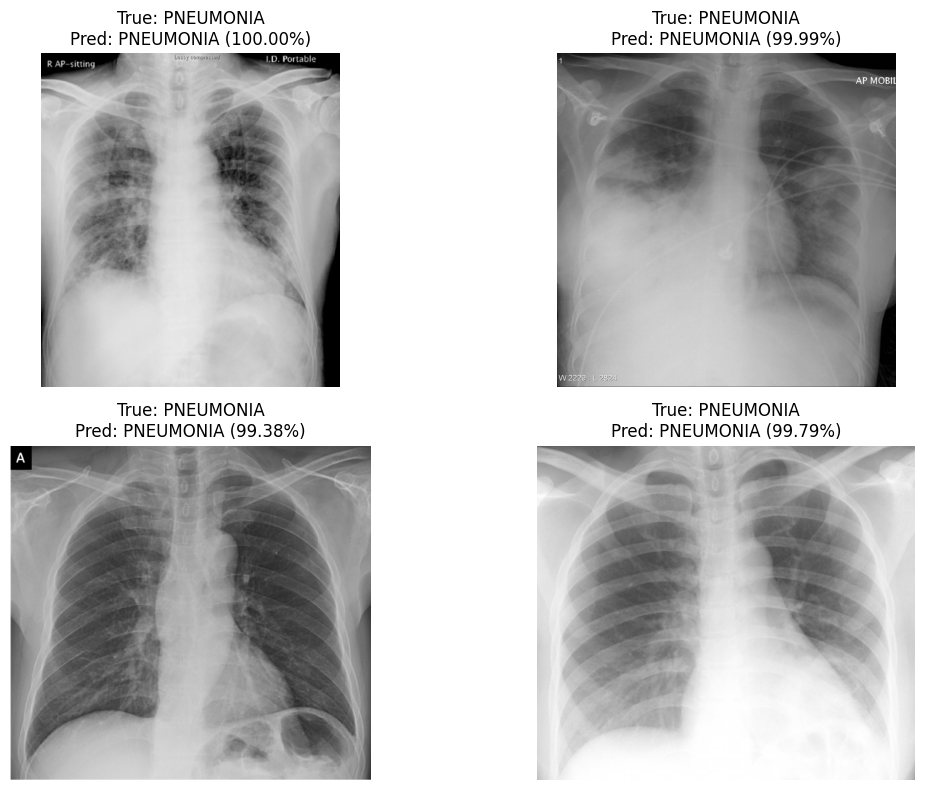

In [37]:
import random

# Get test class subdirectories (e.g., ['NORMAL', 'PNEUMONIA'])
class_names = os.listdir(test_dir)

# Pick 4 random images from test set
sample_images = []
for _ in range(4):
    chosen_class = random.choice(class_names)
    class_path = os.path.join(test_dir, chosen_class)
    chosen_img = random.choice(os.listdir(class_path))
    sample_images.append((os.path.join(class_path, chosen_img), chosen_class))

# Predict and plot
plt.figure(figsize=(12, 8))

for idx, (img_path, true_class) in enumerate(sample_images):
    image_pil = Image.open(img_path).convert("RGB")
    image_np = tf.keras.utils.img_to_array(image_pil)
    img_gray = cv.cvtColor(image_np, cv.COLOR_RGB2GRAY)
    img_resized = cv.resize(img_gray, (224, 224))
    img_norm = img_resized / 255.0
    img_input = img_norm.reshape(1, 224, 224, 1)

    prediction = model.predict(img_input)[0][0]

    pred_class = "PNEUMONIA" if prediction >= 0.5 else "NORMAL"
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    # Plot
    plt.subplot(2, 2, idx+1)
    plt.imshow(image_pil)
    plt.axis('off')
    plt.title(f"True: {true_class}\nPred: {pred_class} ({confidence*100:.2f}%)")

plt.tight_layout()
plt.show()



In [38]:
# Save the model
model.save('/content/COVID19_Xray_Detection.h5')

In [41]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [42]:
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2 as cv
from PIL import Image

# Title
st.title("COVID-19 X-ray Classification")
st.write("Upload a chest X-ray image to classify as NORMAL or PNEUMONIA.")

# Load the model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("COVID19_Xray_Detection.h5")
    return model

model = load_model()

# File uploader
uploaded_file = st.file_uploader("Choose an X-ray image...", type=["jpg", "jpeg", "png"])

# Preprocessing function
def preprocess_image(image):
    image_rgb = image.convert("RGB")
    image_np = tf.keras.utils.img_to_array(image_rgb)
    img_gray = cv.cvtColor(image_np, cv.COLOR_RGB2GRAY)
    img_resized = cv.resize(img_gray, (224, 224))
    img_normalized = img_resized / 255.0
    img_input = img_normalized.reshape(1, 224, 224, 1)
    return img_input

# Make prediction and display result
if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded X-ray', use_column_width=True)

    # Process and predict
    img_input = preprocess_image(image)
    prediction = model.predict(img_input)[0][0]

    # Show result
    if prediction >= 0.5:
        st.error(f"**PNEUMONIA Detected** with confidence **{prediction * 100:.2f}%**")
    else:
        st.success(f"**NORMAL** with confidence **{(1 - prediction) * 100:.2f}%**")


2025-07-11 09:14:12.717 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:14:12.860 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-11 09:14:12.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:14:12.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:14:12.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:14:12.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:14:12.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:14:12.885 Thread 'MainThread': mi